In [1]:
# Ensemble : Model들을 같이 엮어서 사용하는 방법, 앙상블 기법

In [2]:
library(randomForest)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [3]:
# Sampling
set.seed(1234) # 
library(caret)
samp <- createDataPartition(iris$Species, p=0.7, list=F) # p = ? 
# 학습용 데이터 만들기
data.tr <- iris[samp,]
# 검증용 데이터 만들기
data.test <- iris[-samp,]
# 문제 및 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [4]:
# 학습시키기
model.rf <- randomForest(Species ~ ., data = data.tr , ntree=100) # ntree = ctree 몇개 쓸거냐

In [5]:
# 검증하기
pred <- predict(model.rf, x)

In [6]:
# 예측력과 오분류표
mean(pred ==y)
table(pred ,y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

In [7]:
# 인공신경망 : type = "class" , "row" -> 숫자가 나옴
# randomForest : factor이면 객관식 아니면 주관식으로 알아서 푼다

---
### 교통사고 예측하기 (회귀식과 RandomForest 예측비교)

In [8]:
seoul <- read.csv("../Data/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [9]:
# 종로구 데이터셋 만들기
JongRo <- subset(seoul, 자치구명 == "종로구")

In [10]:
head(JongRo)
tail(JongRo)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2407,2019,7,종로구,83,0,109
2408,2019,8,종로구,115,0,164
2409,2019,9,종로구,99,0,143
2410,2019,10,종로구,104,0,139
2411,2019,11,종로구,100,0,126
2412,2019,12,종로구,100,0,142


In [11]:
# row names 정리하기
rownames(JongRo) <- c()
head(JongRo)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [12]:
str(JongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [13]:
# factor 정리하기
JongRo$자치구명 <- factor(JongRo$자치구명)
str(JongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [14]:
# 종로의 발생건수와 부상자수 상관계수 
cor(JongRo$발생건수, JongRo$부상자수)

[1] 0.9208914

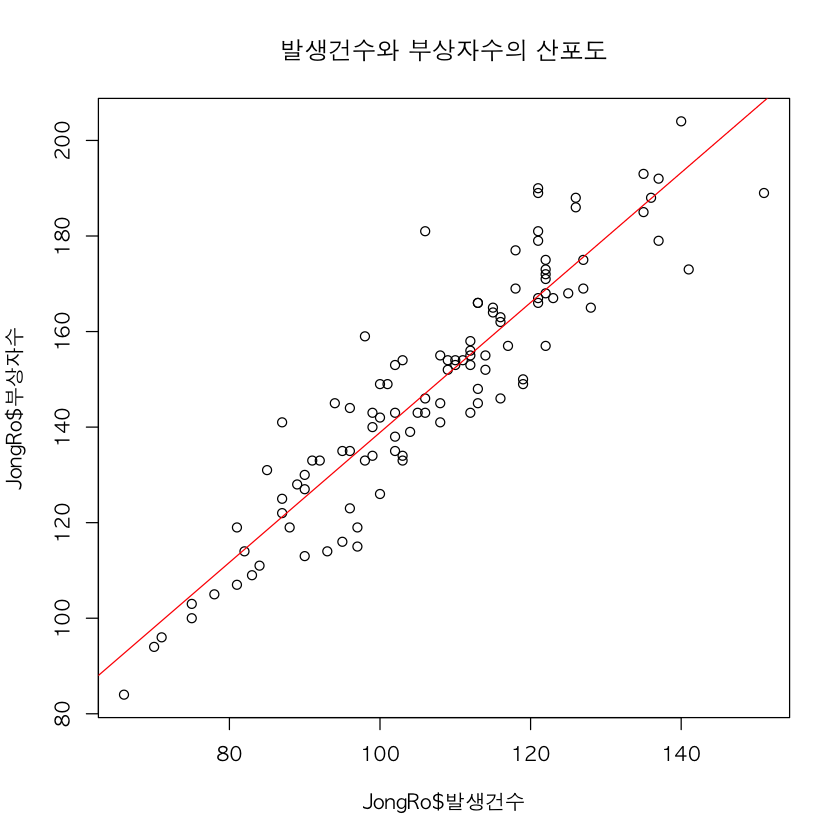

In [15]:
# 종로구의 발생건수와 부상자수의 산포도와 회귀선 그리기
par(family = "AppleGothic")
options(warn=-1)
plot(JongRo$부상자수 ~JongRo$발생건수,
    main = "발생건수와 부상자수의 산포도")
r <- lm(JongRo$부상자수 ~JongRo$발생건수 )
abline(r, col ='red') 
options(warn=-1)

In [23]:
# 예측력
summary(r)


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477    0.635    
JongRo$발생건수  1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


- p-value: < 2.2e-16
- Adjusted R-squared:  0.8466 
- Residual standard error: 9.816

In [24]:
# 회귀식
# - 발생건수가 100건일 경우의 부상자수 예측
r


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Coefficients:
    (Intercept)  JongRo$발생건수  
          2.886            1.360  


In [175]:
cat(1.360*100-9.816 , "~", 1.360*100+9.816)
1.360*200 + 2.886 # 왜?


126.184 ~ 145.816

[1] 274.886

In [174]:
model.rf <- randomForest(부상자수 ~ 발생건수 , data = JongRo, ntree = 1000)
발생건수 = 200
x <- data.frame(발생건수)
predict(model.rf, x)

1 
184.9428

In [1]:
# 데이터가 군데군데 비어있으면 회귀식으로 분석하는게 나음, 공부하는 데이터가 없기 때문에 아무데이터나 추출 ? 
# 해결 : randomForest 쓸려면 데이터가 많아야 함 